# Data wrangling: pollution in one state
Plan to explore a single state and then venture out to work on regions
# Importing libraries

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

import openaq
from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

#Load data

In [125]:
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')



# Explore aqi by county dataset

In [126]:
# work with one state massachusetts 2019

print(daily_aqi_by_county_2019.columns)

print(daily_aqi_by_county_2017.loc[daily_aqi_by_county_2019['State Name'].str.startswith('Mass')])

mass19 = daily_aqi_by_county_2019['State Code'] == 25

print(daily_aqi_by_county_2019.loc[mass19])

mass19 = pd.DataFrame(daily_aqi_by_county_2019[mass19])
mass19.drop(['State Code', 'State Name'], axis=1, inplace=True)
mass19.head()

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
           State Name county Name  State Code  County Code        Date  AQI  \
133919       Maryland  Washington          24           43  2017-03-26   33   
133920       Maryland  Washington          24           43  2017-03-27   34   
133921       Maryland  Washington          24           43  2017-03-28   55   
133922       Maryland  Washington          24           43  2017-03-29   41   
133923       Maryland  Washington          24           43  2017-03-30   37   
...               ...         ...         ...          ...         ...  ...   
138628  Massachusetts   Worcester          25           27  2017-04-09   47   
138629  Massachusetts   Worcester          25           27  2017-04-10   87   
138630  Massachusetts   Worcester          25           27  2017-04-11   97   
138631  Massa

,county Name,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
133919,Barnstable,1,2019-01-01,33,Good,Ozone,25-001-0002,1
133920,Barnstable,1,2019-01-02,35,Good,Ozone,25-001-0002,1
133921,Barnstable,1,2019-01-03,36,Good,Ozone,25-001-0002,1
133922,Barnstable,1,2019-01-04,26,Good,Ozone,25-001-0002,1
133923,Barnstable,1,2019-01-05,37,Good,Ozone,25-001-0002,1


       County Code          AQI  Number of Sites Reporting
count  4714.000000  4714.000000                4714.000000
mean     13.645736    38.623250                   1.677980
std       8.242896    10.589007                   0.732266
min       1.000000     2.000000                   1.000000
25%       7.000000    32.000000                   1.000000
50%      13.000000    38.000000                   2.000000
75%      21.000000    44.000000                   2.000000
max      27.000000   126.000000                   3.000000


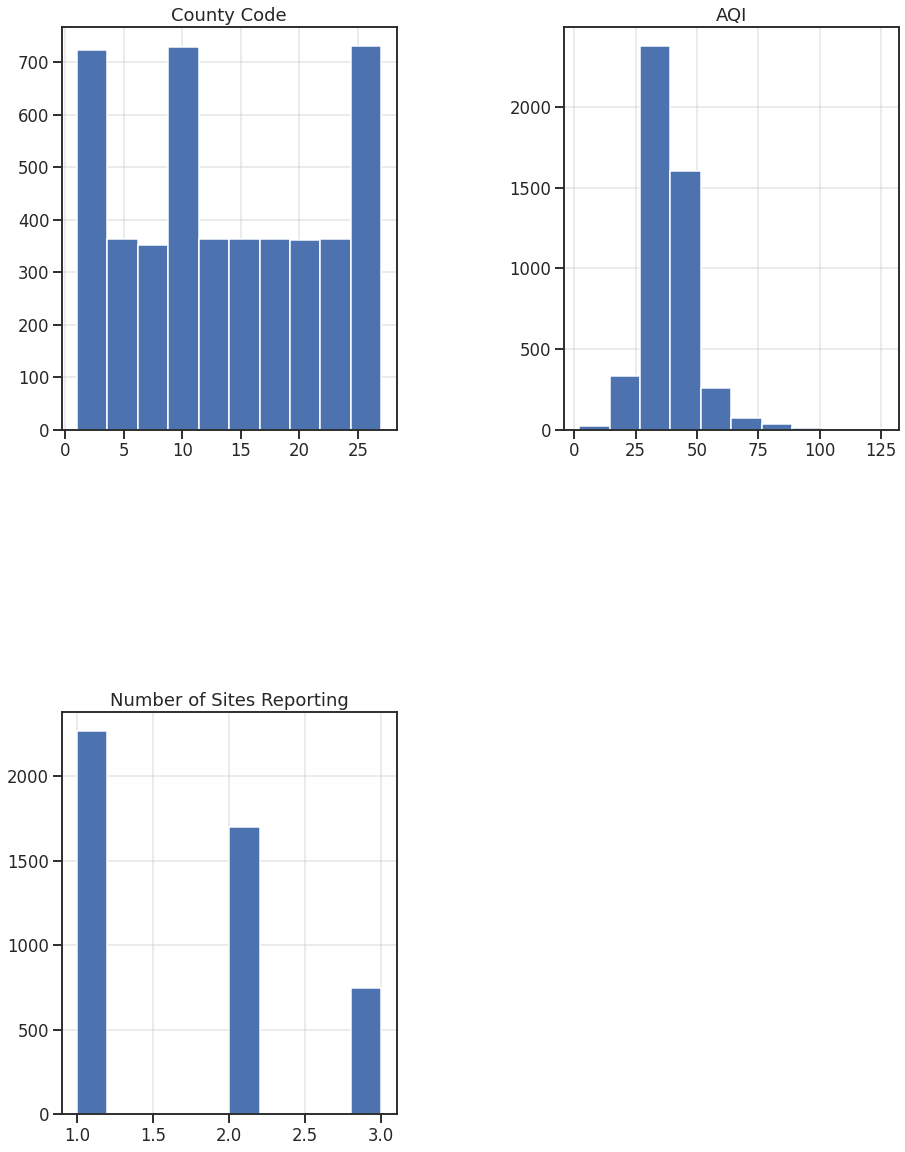

In [127]:
# klib.dist_plot(mass19)

print(mass19.describe())

mass19.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

<BarContainer object of 4714 artists>

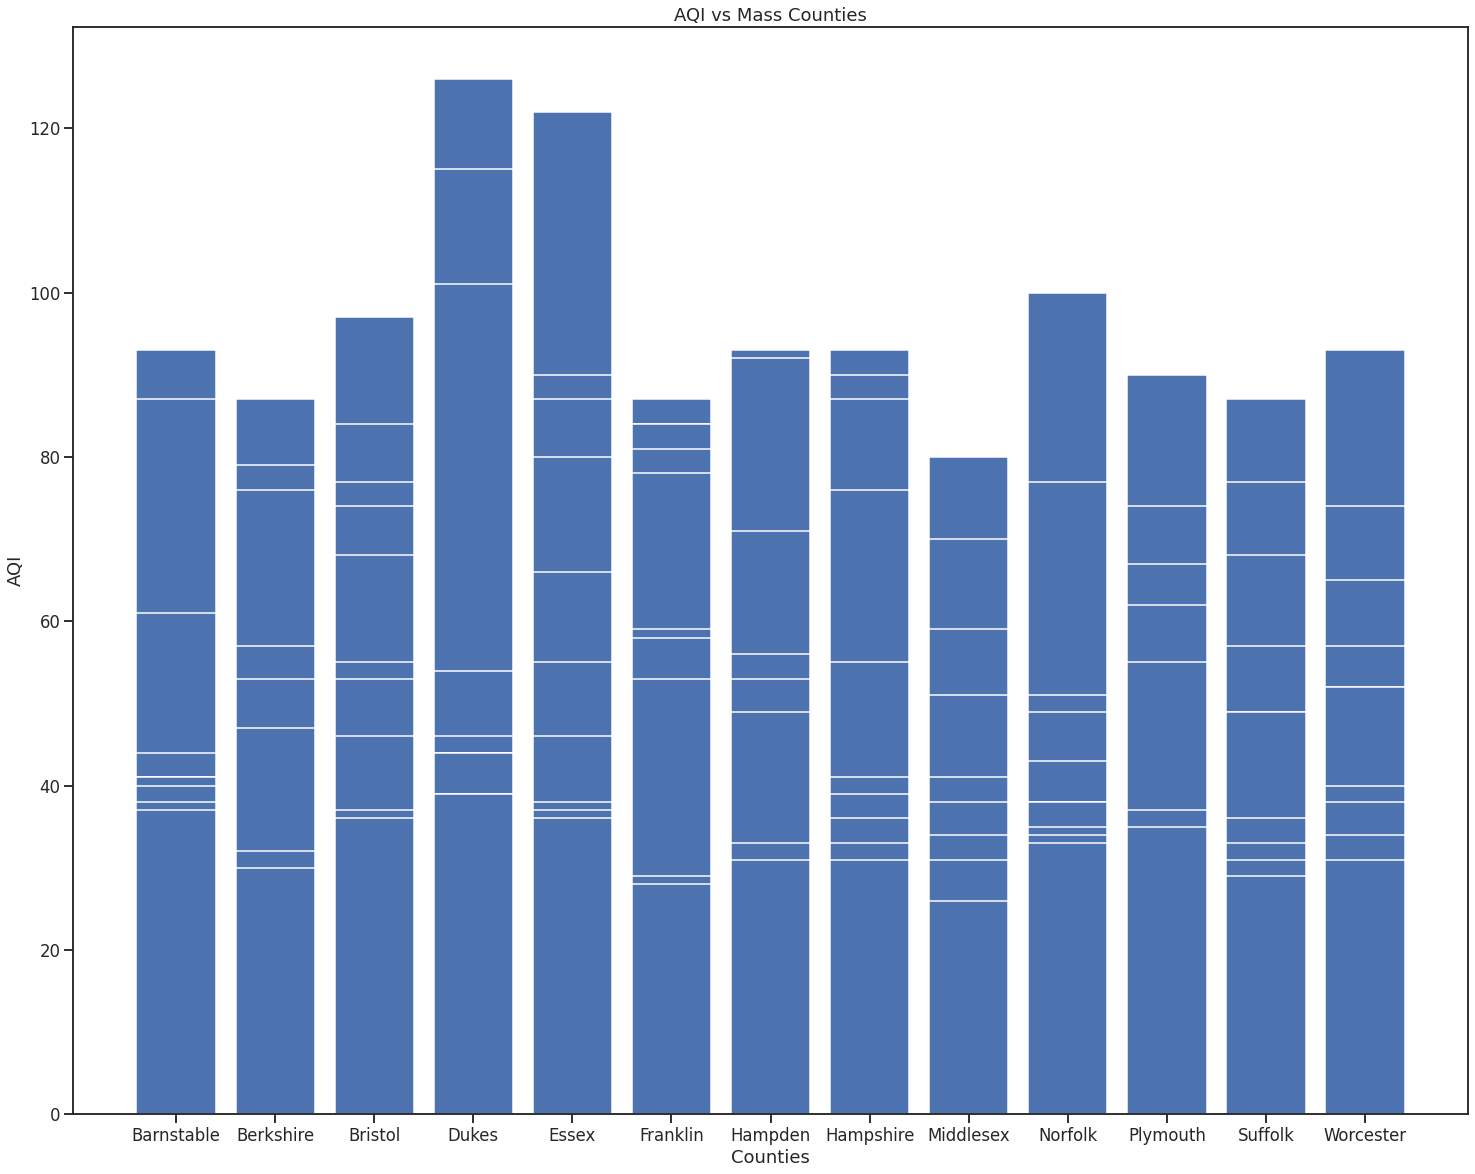

In [128]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(mass19['county Name'], mass19['AQI'])

<BarContainer object of 13 artists>

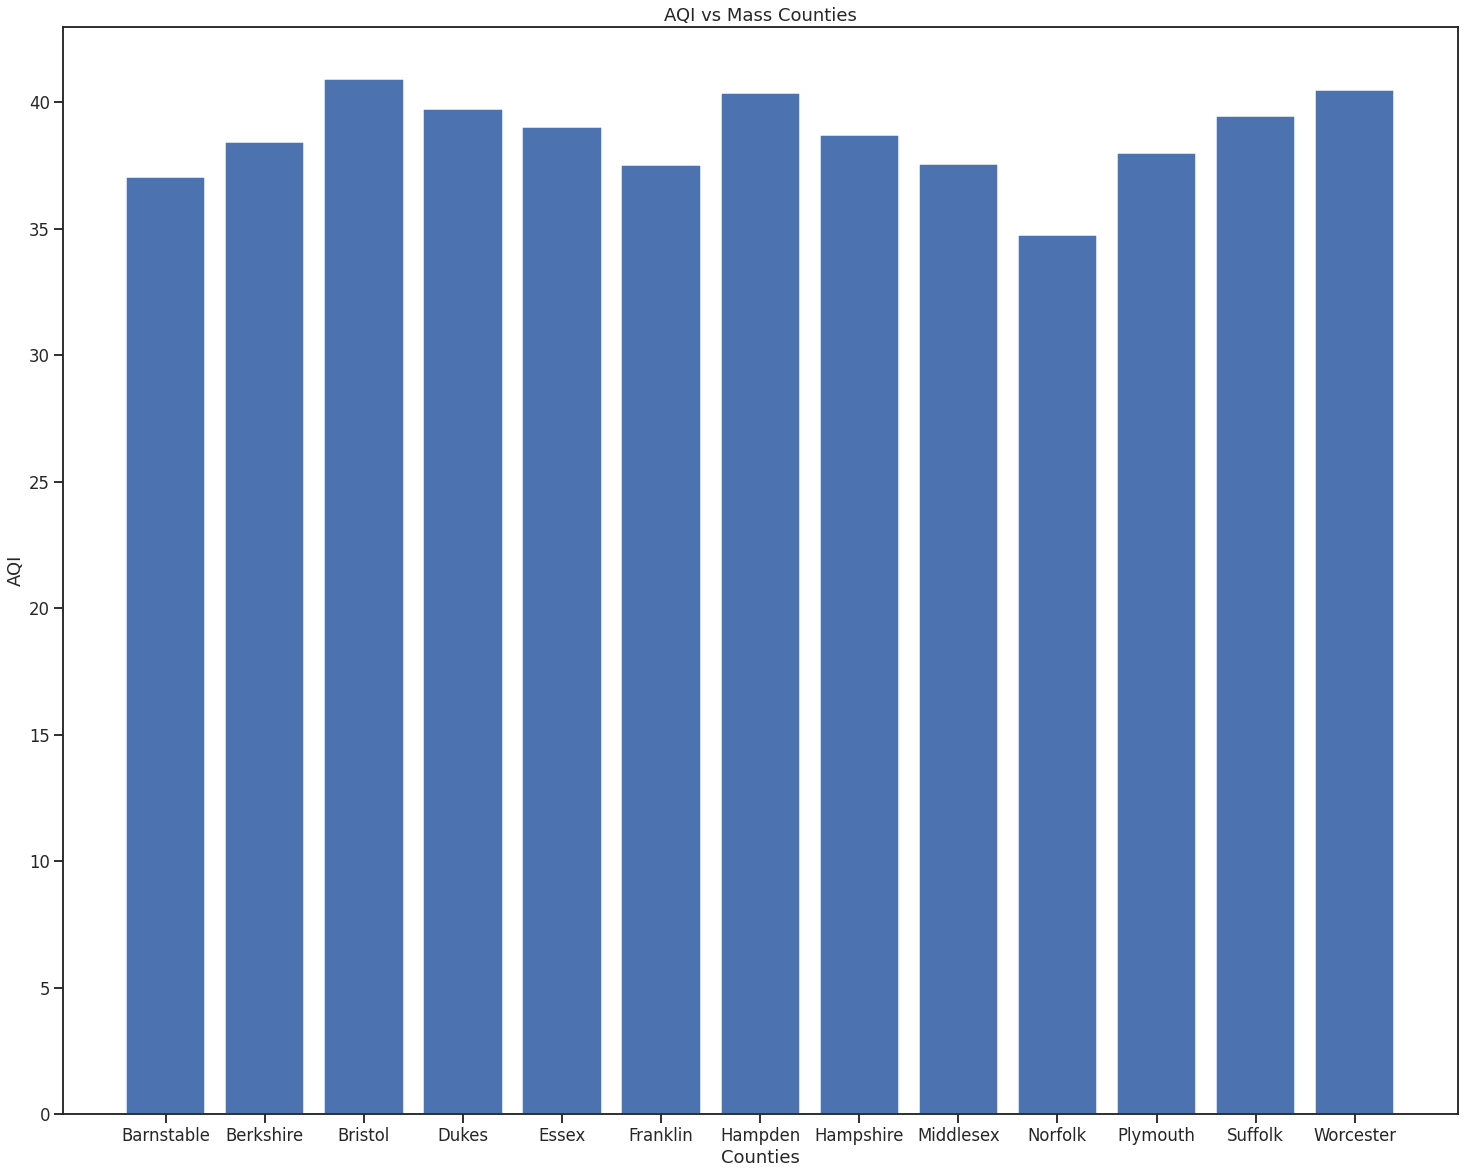

In [129]:
# bar plot of average aqi by county

mean_mass_AQI = mass19.groupby('county Name')[['AQI']].mean()
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(mean_mass_AQI.index, mean_mass_AQI['AQI'])

In [130]:
# check for missing data in mass19

mass19.isna().sum()

county Name                  0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [151]:
max = mass19.AQI == mass19.AQI.max()
min = mass19.AQI == mass19.AQI.min()
display(mass19.loc[max | min])

# check what are the defining parameters
mass19['Defining Parameter'].unique()


,county Name,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
135195,Dukes,7,2019-07-20,126,Unhealthy for Sensitive Groups,Ozone,25-007-0001,1
138206,Suffolk,25,2019-10-31,2,Good,CO,25-025-0042,1


array(['Ozone', 'PM2.5', 'NO2', 'CO'], dtype=object)